<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2024/5

### CS6462 Assignment 2 - Bayesian Networks, ML with Python

### Instructor: Emil Vassev
March 13th, 2025
<br><br>
Copyright (C) 2025 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">Aryank</span>
### Student Surname: <span style="color:red">Gupta</span>
### Student ID: <span style="color:red">24101613</span>
### Date of Final Submission: <span style="color:red">03/04/2025</span>
***

# Task #1: Bayesian Networks (50%)

In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “**Notebook Lesson: Building Bayesian Networks with Python**”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures.
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, moderate or active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity.

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (10%)

### Step 1.1. Describe the problem (2%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

<span style="color:red">

Random Variables and Domains:

Intelligence (I): Represents the student's intelligence level and can take two possible values: Low or High.

Difficulty (D): Denotes the difficulty level of the CS6264 module. It can be either Easy or Hard.

Health (H): Indicates the student's health condition, with possible values: Sick or Healthy.

Grade (G): Represents the student’s grade in the CS6264 module, with three possible outcomes: A, B, or C.

Forum Activity (F): Reflects the student’s participation level in the module forum. It can take on three values: Not Active, Moderate, or Active.

Recommendation Letter (R): Refers to the quality of the recommendation letter written by the professor. This can be either Weak or Strong.

Dependencies among Random Variables:

The student's Grade (G) depends on their Intelligence (I), the Difficulty (D) of the module, and their Health (H).
The quality of the Recommendation Letter (R) depends on the student's Grade (G) and their Forum Activity (F).</span>

### Step 1.2. Draw and show the DAG (2%)

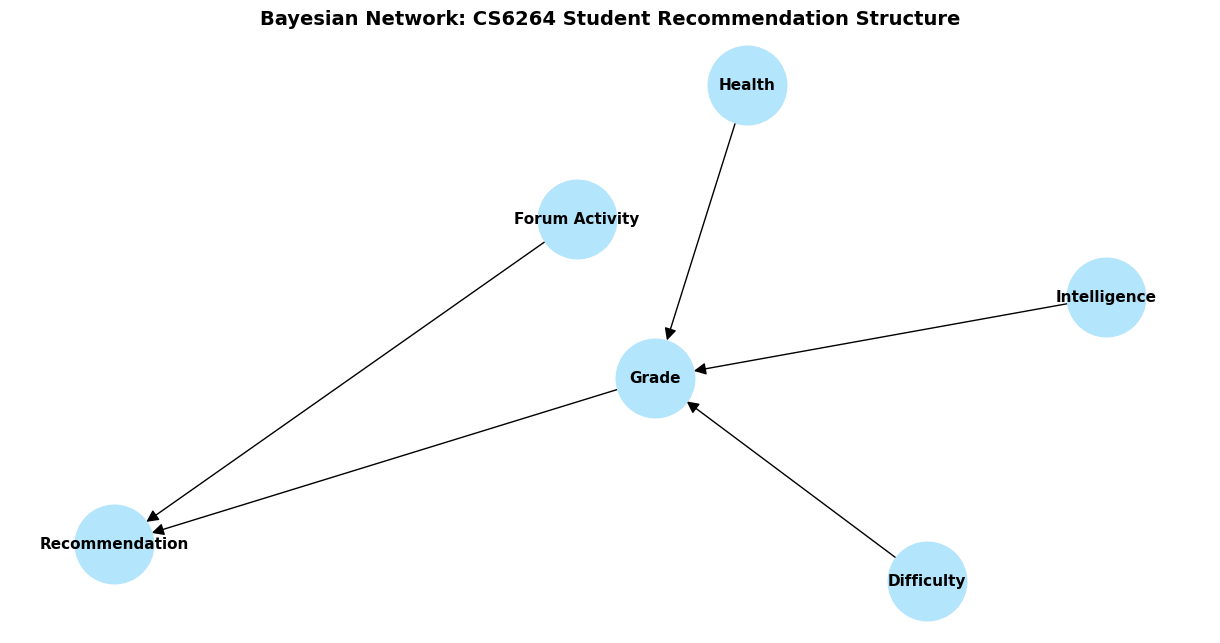

In [18]:
import networkx as nx  # Imported the networkx library and aliased it as 'nx'
import matplotlib.pyplot as plt

# Created a new directed acyclic graph for modeling dependencies among student-related variables
dag2 = nx.DiGraph()

# Inserted edges according to the defined conditional relationships
dag2.add_edges_from([
    ("Intelligence", "Grade"),
    ("Difficulty", "Grade"),
    ("Health", "Grade"),
    ("Grade", "Recommendation"),
    ("Forum Activity", "Recommendation")
])

# Initialized layout for consistent node placement
layout_pos = nx.spring_layout(dag2, seed=10)

# Initialized plot area with specific dimensions
plt.figure(figsize=(12, 6))

# Drew nodes, edges, and labels with customized styling
nx.draw(
    dag2, layout_pos,
    with_labels=True,
    node_size=3200,
    node_color="#B3E5FC",  # pastel blue
    font_size=11,
    font_weight="bold",
    edge_color="black",
    arrowsize=18
)

# Added a title to represent the purpose of the graph
plt.title("Bayesian Network: CS6264 Student Recommendation Structure", fontsize=14, fontweight="bold")
plt.axis('off')  # Hides axes for a cleaner visual
plt.show()


### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (5%)

In [14]:
!pip install pgmpy==0.1.19

In [6]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [15]:
# Constructed the Bayesian Network structure with specified dependencies
student_model = BayesianModel([
    ("Intelligence", "Grade"),
    ("Difficulty", "Grade"),
    ("Health", "Grade"),
    ("Grade", "Recommendation"),
    ("Forum Activity", "Recommendation")
])

# Displayed the defined structure of the Bayesian Model
print("Defined Bayesian Network Structure:")
print(student_model.edges())

Defined Bayesian Network Structure:
[('Intelligence', 'Grade'), ('Grade', 'Recommendation'), ('Difficulty', 'Grade'), ('Health', 'Grade'), ('Forum Activity', 'Recommendation')]


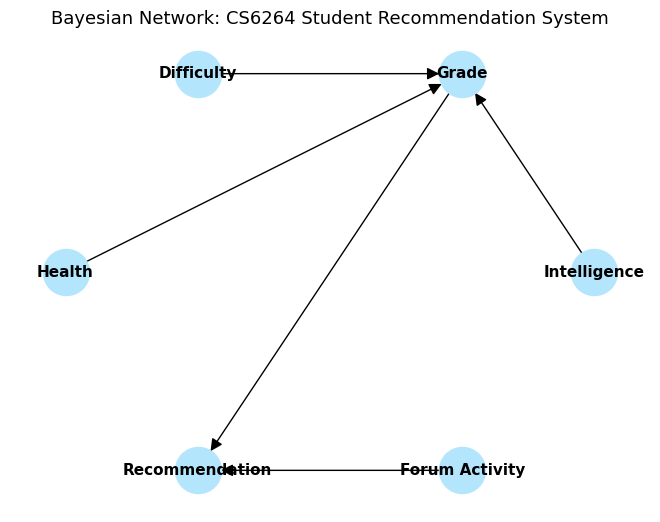

In [16]:
# Created a circular visualization of the Bayesian Network using pgmpy's structure
nx.draw_circular(
    student_model,
    with_labels=True,
    node_size=1100,
    node_color="#B3E5FC",  # soft blue
    font_size=11,
    font_weight='bold',
    arrowsize=18
)

# Added title for clarity and context
plt.title("Bayesian Network: CS6264 Student Recommendation System", fontsize=13)
plt.show()

### Step 1.4. Show the DAG of the Bayesian Network (1%)

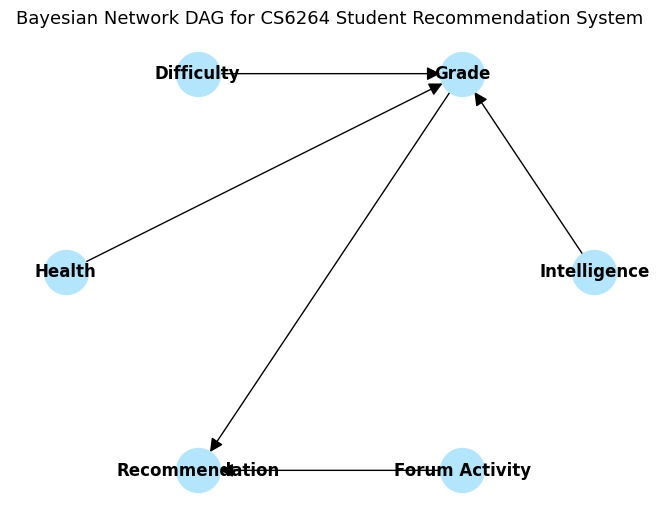

In [19]:
# Created a circular layout visualization of the Bayesian Network model
nx.draw_circular(
    student_model,
    with_labels=True,
    node_size=1000,
    node_color="#B3E5FC",  # pastel blue
    font_size=12,
    font_weight='bold',
    arrowsize=20
)

# Added a title to describe the Bayesian Network layout
plt.title("Bayesian Network DAG for CS6264 Student Recommendation System", fontsize=13)
plt.show()


## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (25%)

### Step 2.1: Build the probability distribution tables with TabularCPD (22%)

In [20]:
import numpy as np
np.product = np.prod  # Reassigned alias to avoid deprecated function usage

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defined the Bayesian Network structure using causal dependencies
student_model = BayesianModel([
    ("Intelligence", "Grade"),
    ("Difficulty", "Grade"),
    ("Health", "Grade"),
    ("Grade", "Recommendation"),
    ("Forum Activity", "Recommendation")
])

# Created CPD for 'Intelligence' with prior probabilities
cpd_intelligence = TabularCPD(
    variable="Intelligence", variable_card=2,
    values=[[0.7], [0.3]],
    state_names={"Intelligence": ["Low", "High"]}
)

# Created CPD for 'Difficulty' as a root variable
cpd_difficulty = TabularCPD(
    variable="Difficulty", variable_card=2,
    values=[[0.6], [0.4]],
    state_names={"Difficulty": ["Easy", "Hard"]}
)

# Added CPD for 'Health' based on domain knowledge
cpd_health = TabularCPD(
    variable="Health", variable_card=2,
    values=[[0.3], [0.7]],
    state_names={"Health": ["Sick", "Healthy"]}
)

# Assigned probability distribution for independent variable 'Forum Activity'
cpd_forum = TabularCPD(
    variable="Forum Activity", variable_card=3,
    values=[[0.2], [0.5], [0.3]],
    state_names={"Forum Activity": ["Not Active", "Moderate", "Active"]}
)

# Constructed CPD for 'Grade' influenced by Intelligence, Difficulty, and Health
cpd_grade = TabularCPD(
    variable="Grade", variable_card=3,
    values=[
        [0.8, 0.6, 0.7, 0.5, 0.6, 0.4, 0.5, 0.3],  # A
        [0.15, 0.3, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4],  # B
        [0.05, 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.3],  # C
    ],
    evidence=["Intelligence", "Difficulty", "Health"],
    evidence_card=[2, 2, 2],
    state_names={
        "Grade": ["A", "B", "C"],
        "Intelligence": ["Low", "High"],
        "Difficulty": ["Easy", "Hard"],
        "Health": ["Sick", "Healthy"]
    }
)

# Formulated CPD for 'Recommendation' based on student's grade and forum participation
cpd_recommendation = TabularCPD(
    variable="Recommendation", variable_card=2,
    values=[
        [0.9, 0.8, 0.6, 0.8, 0.6, 0.5, 0.6, 0.4, 0.2],  # Weak
        [0.1, 0.2, 0.4, 0.2, 0.4, 0.5, 0.4, 0.6, 0.8],  # Strong
    ],
    evidence=["Grade", "Forum Activity"],
    evidence_card=[3, 3],
    state_names={
        "Recommendation": ["Weak", "Strong"],
        "Grade": ["A", "B", "C"],
        "Forum Activity": ["Not Active", "Moderate", "Active"]
    }
)

# Added all CPDs to the model
student_model.add_cpds(
    cpd_intelligence, cpd_difficulty, cpd_health,
    cpd_forum, cpd_grade, cpd_recommendation
)

# Checked the model for validity
print("Model is valid:", student_model.check_model())


Model is valid: True


/usr/local/lib/python3.11/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


### Step 2.2: Associate the distribution models with the network structure (2%)

In [21]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Re-declared the Bayesian Model structure for consistency
student_model = BayesianModel([
    ('Intelligence', 'Grade'),
    ('Difficulty', 'Grade'),
    ('Health', 'Grade'),
    ('Grade', 'Recommendation'),
    ('Forum Activity', 'Recommendation')
])

# Attached all previously defined CPDs to the Bayesian model
student_model.add_cpds(
    cpd_intelligence,
    cpd_difficulty,
    cpd_health,
    cpd_forum,
    cpd_grade,
    cpd_recommendation
)

# Verified the structural and probabilistic validity of the model
if student_model.check_model():
    print("CPDs associated successfully with the Bayesian network!")
else:
    print("CPD association failed. Please verify each CPD and its configuration.")


CPDs associated successfully with the Bayesian network!


### Step 2.3: Check the model (1%)

In [23]:
# Performed validation to ensure the Bayesian Network is well-defined
if student_model.check_model():
    print("The Bayesian Network model is valid!")
else:
    print("There is an issue with the Bayesian model. Please check the CPDs and structure.")


The Bayesian Network model is valid!


## Step 3: Inference with the Bayesian Network (15%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (5%)

In [28]:
from pgmpy.inference import VariableElimination
# Created an inference engine for the Bayesian network
inference_engine = VariableElimination(student_model)

# Performed probabilistic query: P(Grade | Recommendation = Strong)
posterior_grade = inference_engine.query(
    variables=["Grade"],
    evidence={"Recommendation": "Strong"}
)

# Displayed the resulting posterior distribution
print(posterior_grade)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(A) |       0.3957 |
+----------+--------------+
| Grade(B) |       0.3372 |
+----------+--------------+
| Grade(C) |       0.2671 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter (no evidence) (5%)

In [30]:
from pgmpy.inference import VariableElimination

# Initialized the inference engine using the Bayesian model
inference_engine = VariableElimination(student_model)

# Queried the prior probability distribution of the 'Recommendation' variable
prior_recommendation = inference_engine.query(
    variables=["Recommendation"]
)

# Displayed the computed prior distribution
print(prior_recommendation)


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------------------+-----------------------+
| Recommendation         |   phi(Recommendation) |
+========================+=======================+
| Recommendation(Weak)   |                0.6604 |
+------------------------+-----------------------+
| Recommendation(Strong) |                0.3396 |
+------------------------+-----------------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (5%)

In [31]:
# Created an inference object for performing conditional probability queries
inference_engine = VariableElimination(student_model)

# Inferred the probability distribution of Recommendation given weak forum activity
posterior_recommendation = inference_engine.query(
    variables=["Recommendation"],
    evidence={"Forum Activity": "Not Active"}  # 'Not Active' interpreted as weak activity
)

# Printed the resulting conditional distribution
print(posterior_recommendation)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+------------------------+-----------------------+
| Recommendation         |   phi(Recommendation) |
+========================+=======================+
| Recommendation(Weak)   |                0.8267 |
+------------------------+-----------------------+
| Recommendation(Strong) |                0.1733 |
+------------------------+-----------------------+


# Task #2: Machine Learning with Python (50%)

In this task, you are asked to follow the ML process to:

* preprocess a provided dataset, so it will become suitable for ML operations;
* select an appropriate ML model, so it will cope with the specifics of data and ML tasks;
* train the selected ML model on the preprocessed dataset;
* test the selected ML model on the preprocessed dataset.

Please, consult the "**Notebook Lesson: Machine Learning with Python**" for the specifics of the different ML models, the Data Preprocessing staeps and the specifics of Model Training and Testing.

## The Dataset
The provided dataset covers bond trading operations (buy and sell) on a financial market. The data is labeled and provided in its raw format, so it needs to be preprocessed.

The provided dataset can be loaded as following:

In [33]:
url_dataset = "https://raw.githubusercontent.com/evassev/ET5003_SEM1_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT
5,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,325,119752.0,7019,277,D,13,4,OUTRIGHT
6,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,336,117794.0,7019,277,D,13,4,OUTRIGHT
7,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,323,117786.0,7019,277,D,13,4,OUTRIGHT
8,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,337,117795.0,7019,277,D,13,4,OUTRIGHT
9,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,SELL,600000,...,1,1,335,117793.0,11532,177,D,13,4,OUTRIGHT


## Target: In this task you are asked to predict the  <span style="color:red">Bond Price</span>.

## Note: In the following steps use the dataframe object <span style="color:red">df</span>.  

## Here are the steps you need to follow:

## Step 1: Determine the ML Model: Supervised-Classification, Supervised-Regression, or Unsupervised ML Model.  (5%)

<span style="color:red">In this task, we are provided with a dataset containing bond trading operations, and our objective is to predict the bond price. Since the dataset includes both input features and their corresponding outputs (bond prices), this is clearly a case of supervised machine learning.

The variable we aim to predict is numerical and continuous in nature, not a discrete category or class. This rules out classification, as we are not assigning labels but estimating a real-world value.

Given the nature of the prediction target, this problem is best addressed using a supervised regression model. Regression algorithms such as Linear Regression, Decision Tree Regressor, or Random Forest Regressor are well-suited for this task, as they are designed to predict continuous outcomes based on patterns in the data.
</span>

## Step 2: Data Preprocessing.  (35%)

### Step 2.1: Specifics of the dataset.  (5%)
<span style="color:red">
    TODO: Show the specifics of the dataset in terms of:
    <ul>
    <li>shape</li>
    <li>columns (features)</li>
    <li>data types</li>
    <li>statistics for the 'Price' feature</li>
    <li>plot the 'Price' feature</li>
    </ul>    
</span>

Dataset Shape: (18692, 27)

Feature Names: ['NoRelatedSym', 'Symbol', 'SymbolSfx', 'SecurityID', 'SecurityIDSource', 'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'OrderQty', 'SettlDate', 'Currency', 'OrdType', 'TransactTime', 'Price', 'PriceType', 'Yield', 'NoPartIDs', 'PartyID', 'DealerID', 'DealerTraderID', 'CustomerTraderID', 'CustomerID', 'PartyIDSource', 'PartyRole', 'DealerCount', 'OrdSubType']

Data Types by Column:
 NoRelatedSym          int64
Symbol               object
SymbolSfx            object
SecurityID          float64
SecurityIDSource      int64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
Currency             object
OrdType               int64
TransactTime         object
Price               float64
PriceType             int64
Yield               float64
NoPartIDs             int64
PartyID               int64
DealerID              int64
Deal

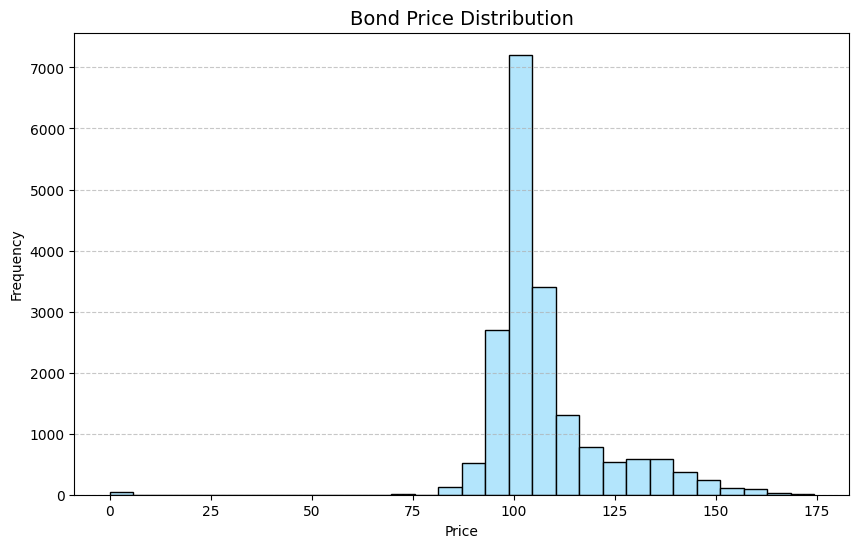

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Displayed the overall structure of the dataset
print("Dataset Shape:", df.shape)

# 2. Listed all columns/features present in the dataset
print("\nFeature Names:", df.columns.tolist())

# 3. Printed the data types of each column
print("\nData Types by Column:\n", df.dtypes)

# 4. Provided summary statistics for the target variable 'Price'
print("\nDescriptive Statistics for 'Price':\n", df['Price'].describe())

# 5. Visualized the distribution of the 'Price' feature
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='#B3E5FC', edgecolor='black')  # consistent pastel blue
plt.title('Bond Price Distribution', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the features with unique values for each row in the dataset.</li>
    <li>Remove the features with unique values for each row in the dataset.</li>
    </ul>    
</span>

In [42]:
# 1. Identified columns where all values are unique (e.g., IDs or transaction codes)
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]

# Displayed the list of such columns
print("Columns with unique values for every row:", unique_columns)

# 2. Removed these columns from the dataset
df = df.drop(columns=unique_columns)


Columns with unique values for every row: []


### Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the features with one unique value for the entire dataset.</li>
    <li>Remove the features with one unique value for the entire dataset.</li>
    </ul>    
</span>

In [43]:
# 1. Detected columns that contain the same value across all rows
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Displayed the list of such constant features
print("Columns with only one unique value:", constant_columns)

# 2. Dropped these non-informative features from the dataset
df = df.drop(columns=constant_columns)


Columns with only one unique value: ['NoRelatedSym', 'SymbolSfx', 'SecurityIDSource', 'Currency', 'OrdType', 'PriceType', 'NoPartIDs', 'PartyID', 'PartyIDSource', 'PartyRole', 'OrdSubType']


### Step 2.4: Data Cleaning: Remove records with null (NAN) values. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the number of null values per feature.</li>
    <li>For any feature, remove the rows containg a null value.</li>
    </ul>    
</span>

In [44]:
# 1. Displayed the count of missing values in each feature
print("Number of missing (NaN) values per column:\n")
print(df.isnull().sum())

# 2. Removed rows containing any null values
df = df.dropna()

# Optional: Confirmed no null values remain
print("\nRemaining missing values after cleanup:\n")
print(df.isnull().sum())


Number of missing (NaN) values per column:

Symbol                  0
SecurityID          12652
SecurityType            0
MaturityDate            0
IssueDate               0
Side                    0
OrderQty                0
SettlDate               0
TransactTime            0
Price                   0
Yield                   8
DealerID                0
DealerTraderID        355
CustomerTraderID        0
CustomerID              0
DealerCount             0
dtype: int64

Remaining missing values after cleanup:

Symbol              0
SecurityID          0
SecurityType        0
MaturityDate        0
IssueDate           0
Side                0
OrderQty            0
SettlDate           0
TransactTime        0
Price               0
Yield               0
DealerID            0
DealerTraderID      0
CustomerTraderID    0
CustomerID          0
DealerCount         0
dtype: int64


### Step 2.5: Data Transformation: Convert all non-numeric features to numeric. (15%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show all non-numeric features.</li>
    <li>Convert the non-numeric features to numeric.</li>
    </ul>    
</span>

In [45]:
# 1. Identified all columns with non-numeric (categorical or object) data types
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric features detected in the dataset:", categorical_columns)

# 2. Applied one-hot encoding to convert categorical features into numeric format
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Non-numeric features detected in the dataset: ['Symbol', 'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'SettlDate', 'TransactTime']


## Step 3: Model Training and Testing.  (10%)

In [46]:
df.shape

(5685, 2541)

In [47]:
df.head(10)

,SecurityID,OrderQty,Price,Yield,DealerID,DealerTraderID,CustomerTraderID,CustomerID,DealerCount,Symbol_013051DB0,...,TransactTime_21:48:21,TransactTime_21:48:41,TransactTime_21:50:04,TransactTime_21:52:51,TransactTime_21:54:57,TransactTime_21:55:51,TransactTime_21:56:30,TransactTime_21:57:33,TransactTime_21:57:36,TransactTime_21:57:41
6204,1657312.0,1000000,111.140,2.243,334,113683.0,11570,454,4,False,...,False,False,False,False,False,False,False,False,False,False
6205,1657312.0,1000000,111.220,2.240,335,114347.0,11570,454,4,False,...,False,False,False,False,False,False,False,False,False,False
6206,1657313.0,5000000,99.760,1.881,323,118599.0,6753,204,1,False,...,False,False,False,False,False,False,False,False,False,False
6207,1657317.0,1250000,111.198,2.241,321,7177.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6208,1657317.0,1250000,111.130,2.244,327,7687.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6209,1657317.0,1250000,111.190,2.241,334,113683.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6210,1657317.0,1250000,111.300,2.236,337,5168.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6211,1657324.0,1250000,111.180,2.241,321,7177.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6212,1657324.0,1250000,111.130,2.244,327,7687.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False
6213,1657324.0,1250000,111.150,2.243,334,113683.0,6687,178,4,False,...,False,False,False,False,False,False,False,False,False,False


### Step 3.1: Select and Import a ML Algorithm. (2%)
<span style="color:red">
    TODO: Based on your rationale provided in Step 1, import one of the following algorithms:
    <ul>
    <li>for Supervised Classification ML use <b>'from sklearn.ensemble import RandomForestClassifier'</b></li>
    <li>for Supervised Regression ML use <b>'from sklearn.ensemble import RandomForestRegressor'</b></li>
    <li>for Unsupervised ML use <b>'from sklearn.cluster import KMeans'</b></li>
    </ul>    
</span>

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn import metrics

### Step 3.2: Train the ML Model. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>from the preprocessed dataset, extract 𝑋 - a dataset of all the features but 'Price'</li>
    <li>from the preprocessed dataset, extract 𝑌  - vector that contains all the values of 'Price'</li>
    <li>slice the dataset: 80% for training and 20% for testing</li>
    <li>create an instance of the selected ML algorithm and train</li>
    </ul>    
</span>

In [49]:
# 1. Removed any remaining records with missing 'Price' values
df = df.dropna(subset=['Price'])

# 2. Separated the feature matrix (X) and target vector (Y)
X = df.drop(columns=['Price'])
Y = df['Price']

# 3. Optionally removed non-informative identifier columns (if any)
X = X.drop(columns=['Bond ID'], errors='ignore')  # Adjust as per actual column names

# 4. Ensured all categorical variables were encoded numerically
X = pd.get_dummies(X)

# 5. Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# 6. Initialized and trained the selected regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

### Step 3.3: Test the ML Model. (3%)
<span style="color:red">
    TODO:
    <ul>
    <li>use the testing part of the dataset to predic the Bond Prices</li>
    <li>compute and show the prediction score</li>
    </ul>    
</span>

In [52]:
# 1. Made predictions using the test dataset
Y_pred = model.predict(X_test)

# 2. Calculated evaluation metrics to assess model performance
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# 3. Displayed the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 6.83
Mean Absolute Error (MAE): 0.85
R² Score: 0.9692
